In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.api import add_constant, Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, classification_report


In [2]:
os.chdir("D:\study\imarticus\python\pandas files")

In [3]:
dataset = pd.read_csv("HeartDisease.csv")

# DATA DESCRIPTION
This dataset consists of the related features ,By using this features We have to predict the whether the person will get heart attack or not(target)

# ATTRIBUTE INFORMATION

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [6]:
dataset.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
dataset.shape

(303, 14)

In [11]:
num = [i for i in dataset.columns if dataset[i].dtype != "object"]

In [12]:
num

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia',
 'target']

In [4]:
#This block is used to check the missing values
#Total = Total number of the missing values
#percent = Percentage of the missing values
total = (dataset.isna().sum()).sort_values(ascending = False)
percent= (dataset.isna().sum()*100/dataset.isna().count()).sort_values(ascending = False)
missing_values = pd.concat([total,percent],axis = 1,keys = ["Total","percentage"])

In [5]:
missing_values

,Total,percentage
target,0,0.0
thalassemia,0,0.0
ca,0,0.0
slope,0,0.0
old_peak,0,0.0
exer_angina,0,0.0
thalach,0,0.0
rest_ecg,0,0.0
fasting_blood_sugar,0,0.0
cholestrol,0,0.0


In [14]:
dataset.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

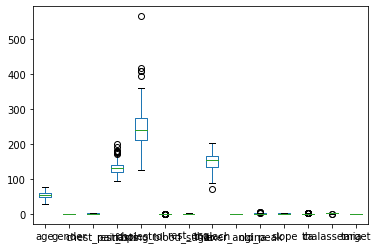

In [16]:
dataset.plot(kind ="box")

In [19]:
dataset.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

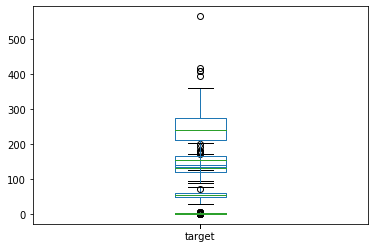

In [20]:

for i in dataset.columns:
     dataset[i].plot(kind = "box")
    

In [23]:
dataset.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

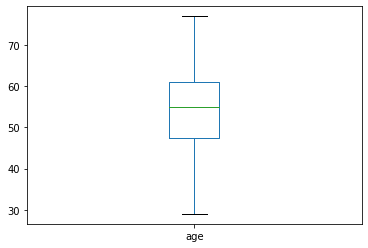

In [22]:
dataset["age"].plot(kind = "box");

In [26]:
dataset["gender"].value_counts()

1    207
0     96
Name: gender, dtype: int64

In [28]:
dataset["chest_pain"].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

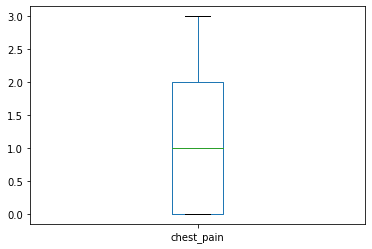

In [27]:
dataset["chest_pain"].plot(kind = "box");

In [29]:
dataset["rest_bps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: rest_bps, dtype: int64

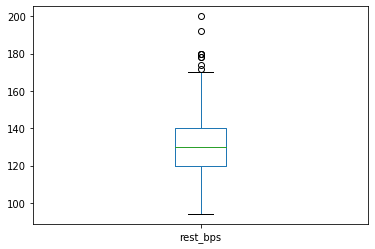

In [32]:
dataset["rest_bps"].plot(kind = "box");


In [6]:
Q1 = dataset["rest_bps"].quantile(0.25)
Q3 = dataset["rest_bps"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)

In [38]:
print(L_B)
print(U_B)

90.0
170.0


In [7]:
dataset["rest_bps"] = np.where(dataset["rest_bps"] > U_B,U_B,dataset["rest_bps"])
dataset["rest_bps"] = np.where(dataset["rest_bps"] <L_B,L_B,dataset["rest_bps"])

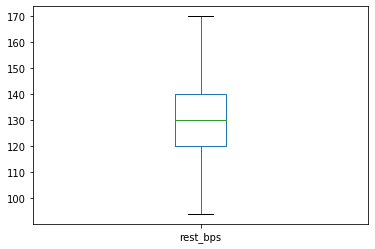

In [41]:
dataset["rest_bps"].plot(kind ="box");


In [42]:
dataset.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

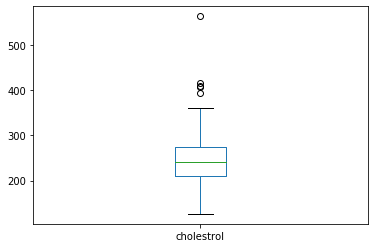

In [44]:
dataset["cholestrol"].plot(kind = "box");

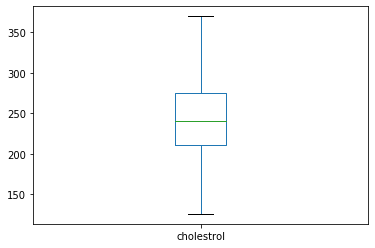

In [9]:
Q1 = dataset["cholestrol"].quantile(0.25)
Q3 = dataset["cholestrol"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)
dataset["cholestrol"] = np.where(dataset["cholestrol"] > U_B,U_B,dataset["cholestrol"])
dataset["cholestrol"] = np.where(dataset["cholestrol"] <L_B,L_B,dataset["cholestrol"])

dataset["cholestrol"].plot(kind ='box');


In [47]:
dataset['fasting_blood_sugar'].value_counts()

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

In [49]:
dataset["rest_ecg"].value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

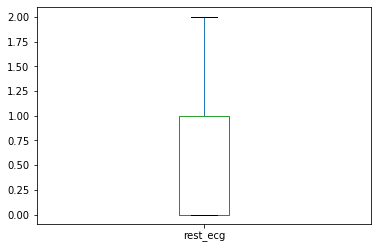

In [48]:
dataset["rest_ecg"].plot(kind= "box")

In [52]:
dataset["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

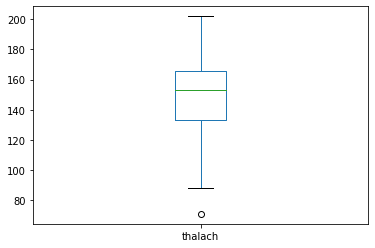

In [10]:
dataset['thalach'].plot(kind = "box");

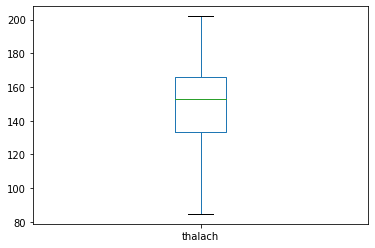

In [11]:
Q1 = dataset["thalach"].quantile(0.25)
Q3 = dataset["thalach"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)
dataset["thalach"] = np.where(dataset["thalach"] > U_B,U_B,dataset["thalach"])
dataset["thalach"] = np.where(dataset["thalach"] <L_B,L_B,dataset["thalach"])

dataset["thalach"].plot(kind ='box');

In [55]:
dataset["exer_angina"].value_counts()

0    204
1     99
Name: exer_angina, dtype: int64

In [56]:
dataset["old_peak"].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: old_peak, dtype: int64

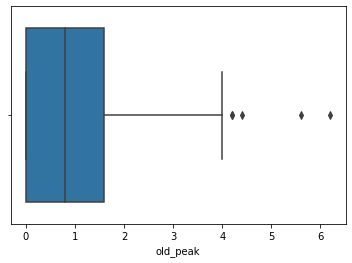

In [59]:
sns.boxplot(dataset["old_peak"]);

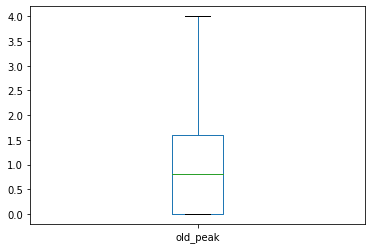

In [12]:
Q1 = dataset["old_peak"].quantile(0.25)
Q3 = dataset["old_peak"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)
dataset["old_peak"] = np.where(dataset["old_peak"] > U_B,U_B,dataset["old_peak"])
dataset["old_peak"] = np.where(dataset["old_peak"] <L_B,L_B,dataset["old_peak"])

dataset["old_peak"].plot(kind ='box');

In [63]:
dataset.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [64]:
dataset['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

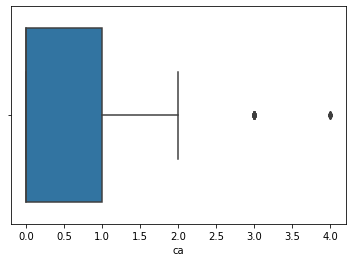

In [65]:
sns.boxplot(dataset['ca'])

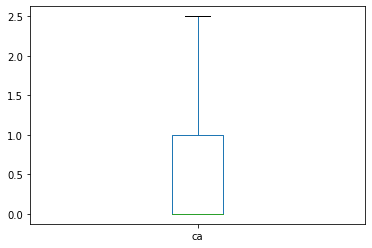

In [13]:
Q1 = dataset["ca"].quantile(0.25)
Q3 = dataset["ca"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)
dataset["ca"] = np.where(dataset["ca"] > U_B,U_B,dataset["ca"])
dataset["ca"] = np.where(dataset["ca"] <L_B,L_B,dataset["ca"])

dataset["ca"].plot(kind ='box');

In [68]:
dataset["thalassemia"].value_counts()

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

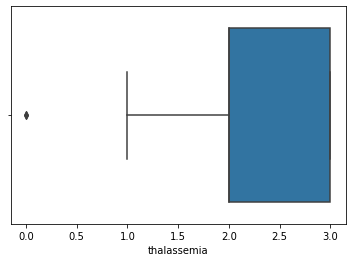

In [67]:
sns.boxplot(dataset["thalassemia"])

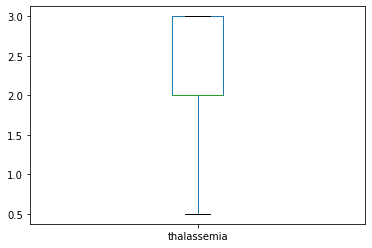

In [14]:
Q1 = dataset["thalassemia"].quantile(0.25)
Q3 = dataset["thalassemia"].quantile(0.75)
IQR = Q3 - Q1
L_B = Q1- (1.5*IQR)
U_B = Q3 + (1.5*IQR)
dataset["thalassemia"] = np.where(dataset["thalassemia"] > U_B,U_B,dataset["thalassemia"])
dataset["thalassemia"] = np.where(dataset["thalassemia"] <L_B,L_B,dataset["thalassemia"])

dataset["thalassemia"].plot(kind ='box');

In [70]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

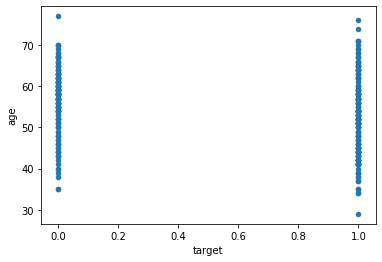

In [45]:
dataset.plot.scatter(x = "target",y = "age",marker ="o");

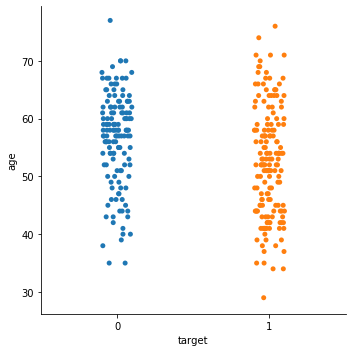

In [47]:
sns.catplot(x = "target",y = "age",data =dataset);

In [48]:
dataset.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
sns.countplot(x = dataset["target"],hue = dataset["age"],palette ='rainbow');

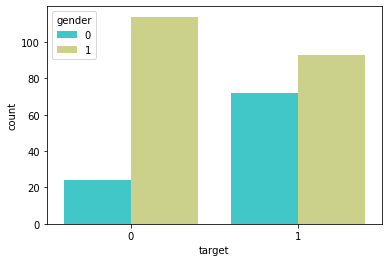

In [49]:
sns.countplot(x =dataset["target"],hue =dataset["gender"],palette ="rainbow");

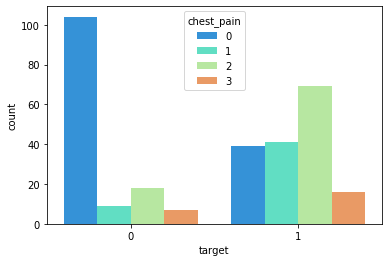

In [51]:
sns.countplot(x =dataset["target"],hue = dataset["chest_pain"],palette = "rainbow");

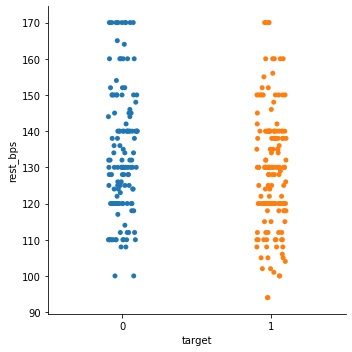

In [52]:
sns.catplot(x ="target",y = "rest_bps",data = dataset);

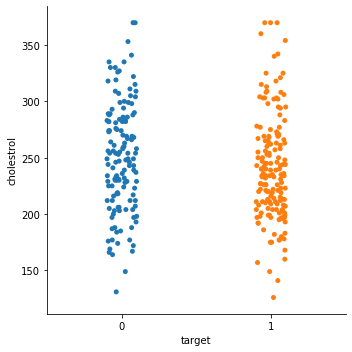

In [54]:
sns.catplot(x = "target",y = "cholestrol", data = dataset);

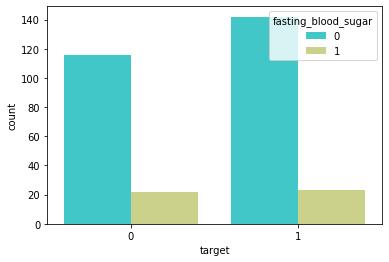

In [58]:
sns.countplot(x = dataset["target"],hue = dataset["fasting_blood_sugar"],palette ="rainbow");

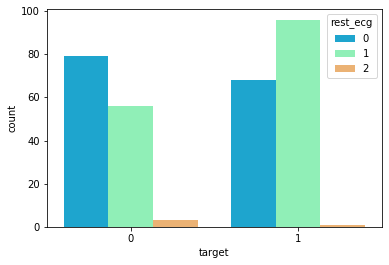

In [59]:
sns.countplot(x = dataset["target"],hue = dataset["rest_ecg"],palette ="rainbow");

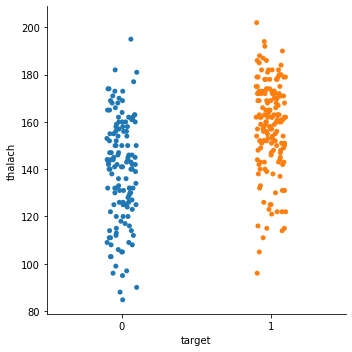

In [61]:
sns.catplot(x = "target",y = "thalach", data = dataset);

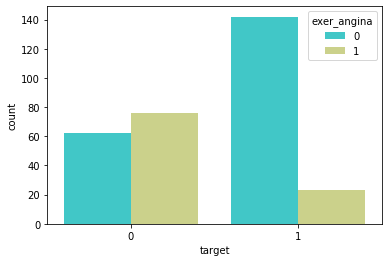

In [60]:
sns.countplot(x = dataset["target"],hue = dataset["exer_angina"],palette ="rainbow");

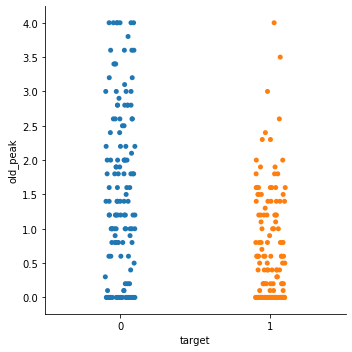

In [62]:
sns.catplot(x = "target",y = "old_peak", data = dataset);

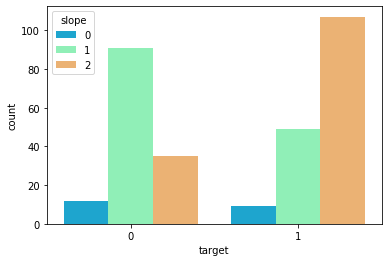

In [63]:
sns.countplot(x = dataset["target"],hue = dataset["slope"],palette ="rainbow");

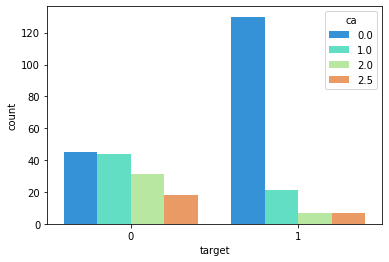

In [67]:
sns.countplot(x = dataset["target"],hue = dataset["ca"],palette ="rainbow");

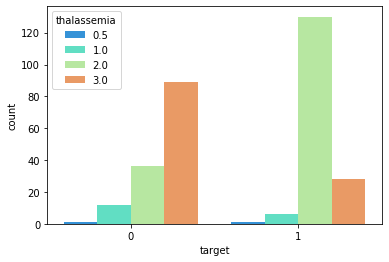

In [64]:
sns.countplot(x = dataset["target"],hue = dataset["thalassemia"],palette ="rainbow");

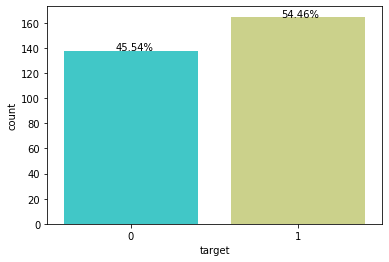

In [30]:
sns.countplot(dataset["target"],palette ="rainbow");
plt.text(x = -0.09,y = dataset["target"].value_counts()[0],s =str(round((dataset["target"].value_counts()[0])*100/len(dataset),2)) + "%")
plt.text(x = 0.9,y= dataset["target"].value_counts()[1],s = str(round((dataset["target"].value_counts()[1])*100/len(dataset),2)) + "%")
plt.show();


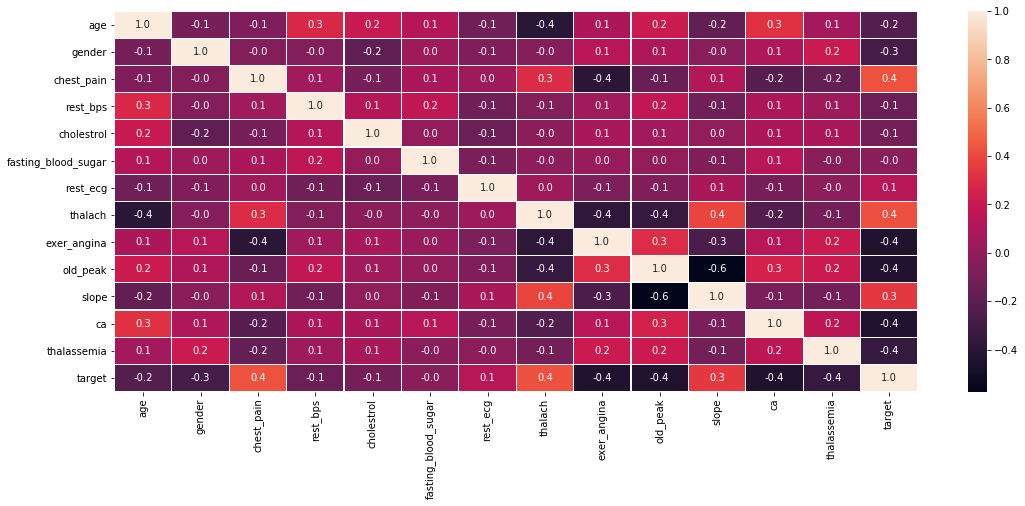

In [40]:
from matplotlib.pyplot import figure
figure(figsize = (18,7))
sns.heatmap(dataset.corr(),annot =True,linewidths=.2, fmt= '.1f');

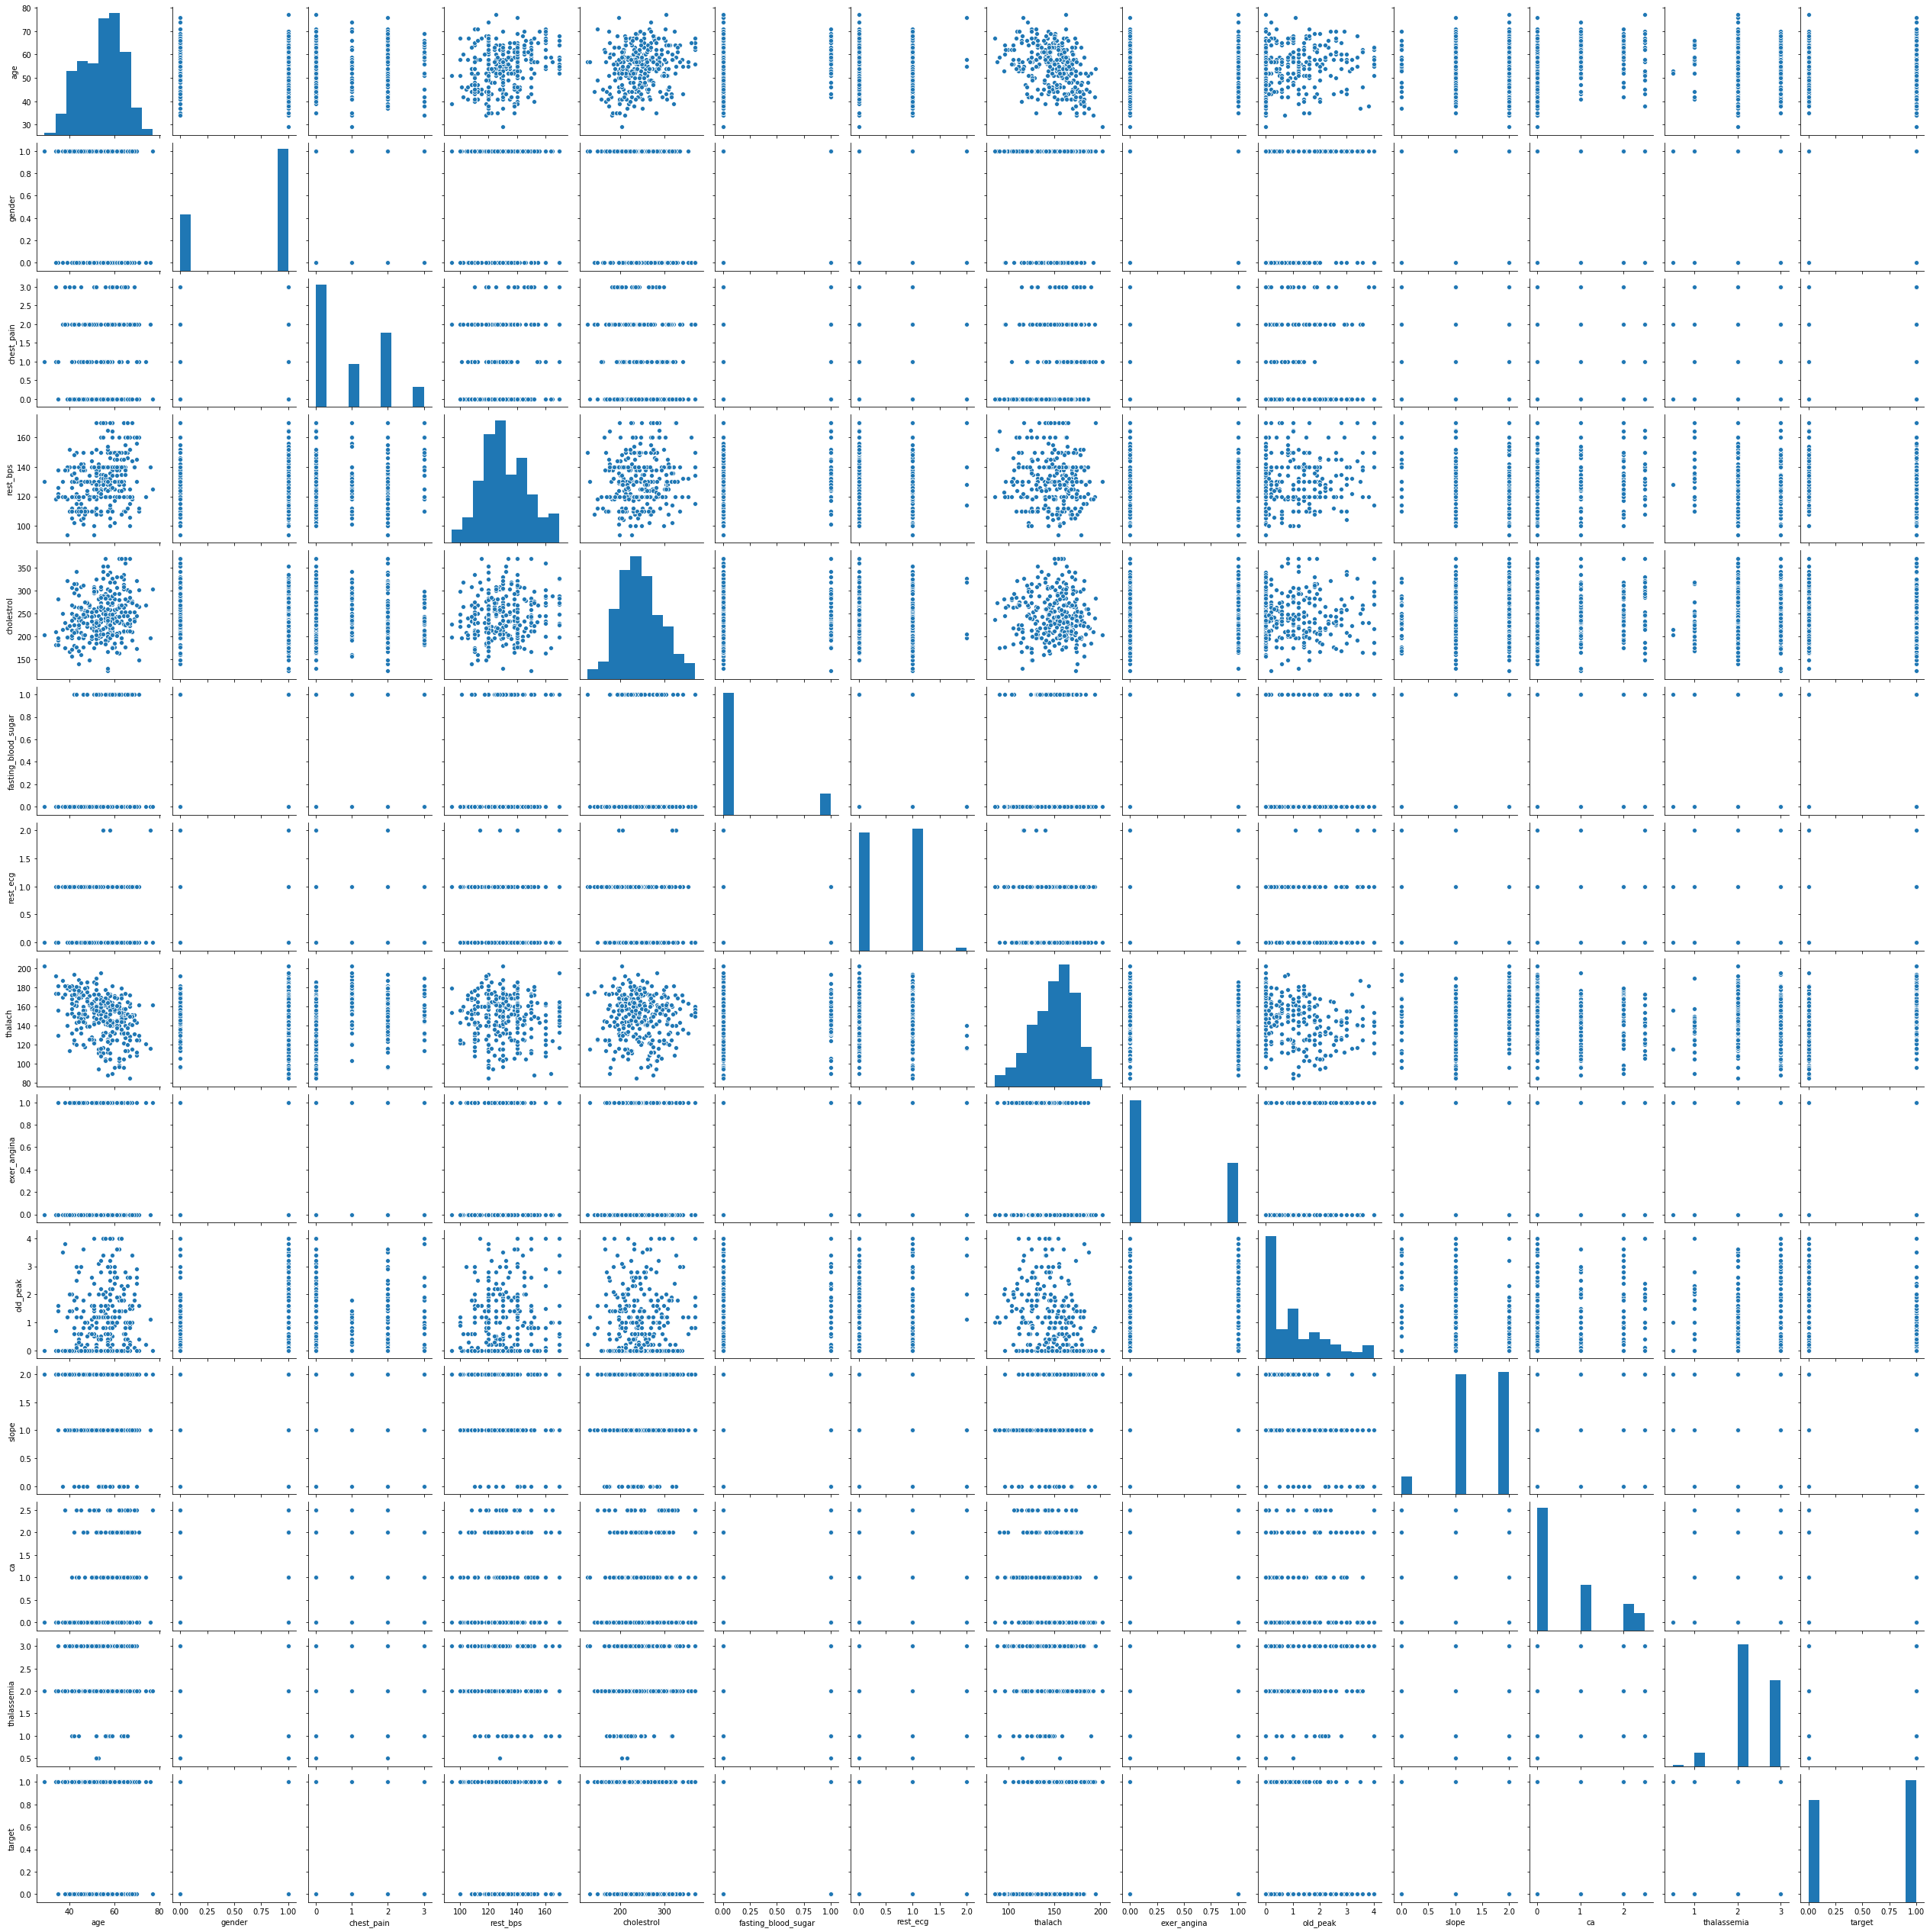

In [41]:
sns.pairplot(dataset)

In [68]:
x = dataset.drop("target",axis =1)

In [69]:
y = dataset["target"]

In [70]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

In [72]:
scaled.shape

(303, 13)

In [73]:
scaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.2       ],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.6       ],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.6       ],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.8       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.4       ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.4       ,
        0.6       ]])

In [74]:
normalization = pd.DataFrame(scaled)
normalization

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.671053,0.438974,1.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.605263,0.471795,0.0,0.5,0.326226,1.0,0.050,0.5,0.0,1.0
299,0.333333,1.0,1.000000,0.210526,0.566154,0.0,0.5,0.402985,0.0,0.300,0.5,0.0,1.0
300,0.812500,1.0,0.000000,0.657895,0.274872,1.0,0.5,0.479744,0.0,0.850,0.5,0.8,1.0
301,0.583333,1.0,0.000000,0.473684,0.020513,0.0,0.5,0.257996,1.0,0.300,0.5,0.4,1.0


In [75]:
x.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
      dtype='object')

In [77]:
normalization.rename(columns ={0:'age',1:'gender',2:'chest_pain',3:'rest_bps',4:'cholestrol',
       5:'fasting_blood_sugar',6:'rest_ecg',7:'thalach',8:'exer_angina',9:'old_peak',
       10:'slope',11:'ca',12:'thalassemia'},inplace =True)

In [78]:
normalization

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,0.708333,1.0,1.000000,0.671053,0.438974,1.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.605263,0.471795,0.0,0.5,0.326226,1.0,0.050,0.5,0.0,1.0
299,0.333333,1.0,1.000000,0.210526,0.566154,0.0,0.5,0.402985,0.0,0.300,0.5,0.0,1.0
300,0.812500,1.0,0.000000,0.657895,0.274872,1.0,0.5,0.479744,0.0,0.850,0.5,0.8,1.0
301,0.583333,1.0,0.000000,0.473684,0.020513,0.0,0.5,0.257996,1.0,0.300,0.5,0.4,1.0


In [79]:
x_train,x_test,y_train,y_test = train_test_split(normalization,y,test_size = 0.3,random_state = 100)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [88]:

log_m =Logit(y_train,x_train).fit()
log_m.summary()

Optimization terminated successfully.
         Current function value: 0.359301
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.4750
Time:                        20:51:05   Log-Likelihood:                -76.172
converged:                       True   LL-Null:                       -145.09
Covariance Type:            nonrobust   LLR p-value:                 1.632e-23
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     2.0984      1.138      1.843      0.065      -0.133       4.330
gender                 -1.4909      0.515     -2.893      0.004      -2.501      -0.481
chest_pain              2.3387      0.649      3.603      0.000       1.067       3.611
rest_bps               -0.8027      0.989     -0.812      0.417      -2.740       1.135
cholestrol             -1.1071      1.217     -0.910      0.363      -3.493       1.279
fasting_blood_sugar    -0.3075      0.636     -0.483      0.629      -1.554       0.939
rest_ecg                0.8132      0.835      0.974      0.330      -0.823       2.449
thalach                 3.6180      1.247      2.902      0.004       1.174       6.062
exer_angina            -0.2476      0.475     -0.521      0.603      -1.179       0.684
old_peak               -1.5408      0.976     -1.578      0.114      -3.454       0.373
slope                   1.9010      0.837      2.270      0.023       0.260       3.542
ca                     -3.3753      0.731     -4.615      0.000      -4.809      -1.942
thalassemia            -2.6257      0.860     -3.052      0.002      -4.312      -0.940
=======================================================================================
"""

In [91]:
testPredDf = pd.DataFrame()

# Get probabilities
testPredDf['Predicted_Prob'] = log_m.predict(x_test) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf['Predicted_Class'] = np.where(testPredDf['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf["Actual"] = y_test

# Validate if the above worked
testPredDf.head()

,Predicted_Prob,Predicted_Class,Actual
69,0.980074,1,1
300,0.011333,0,0
220,0.009316,0,0
134,0.964271,1,1
7,0.810399,1,1


In [93]:
confussionMatrix = pd.crosstab(testPredDf['Predicted_Class'],testPredDf["Actual"])
confussionMatrix

Actual,0,1
Predicted_Class,,
0,37,3
1,9,42


In [94]:
print(classification_report(testPredDf['Predicted_Class'],testPredDf["Actual"]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.93      0.82      0.87        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91



In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 2)
knn_model = knn_classification.fit(x_train, y_train)

In [99]:
testPredDf = pd.DataFrame()

# Get probabilities
testPredDf['Predicted_Prob'] = log_m.predict(x_test) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf['Predicted_Class'] = np.where(testPredDf['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf["Actual"] = y_test

# Validate if the above worked
testPredDf.head()

,Predicted_Prob,Predicted_Class,Actual
69,0.980074,1,1
300,0.011333,0,0
220,0.009316,0,0
134,0.964271,1,1
7,0.810399,1,1


In [100]:
confussionMatrix = pd.crosstab(testPredDf['Predicted_Class'],testPredDf["Actual"])
confussionMatrix

Actual,0,1
Predicted_Class,,
0,37,3
1,9,42


In [101]:
print(classification_report(testPredDf['Predicted_Class'],testPredDf["Actual"]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.93      0.82      0.87        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91



In [102]:
from sklearn.ensemble import RandomForestClassifier
Rf_m = RandomForestClassifier(random_state=123)
Rf_m = Rf_m.fit(x_train,y_train)

In [107]:
testPredDf = pd.DataFrame()

# Get probabilities
testPredDf['Predicted_Prob'] = log_m.predict(x_test) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf['Predicted_Class'] = np.where(testPredDf['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf["Actual"] = y_test

# Validate if the above worked
testPredDf.sample(10)

,Predicted_Prob,Predicted_Class,Actual
225,0.064082,0,0
242,0.077464,0,0
229,0.415158,0,0
205,0.270256,0,0
15,0.961052,1,1
104,0.969095,1,1
293,0.680550,1,0
78,0.955362,1,1
194,0.742082,1,0
10,0.767619,1,1


In [105]:
confussionMatrix = pd.crosstab(testPredDf['Predicted_Class'],testPredDf["Actual"])
confussionMatrix

Actual,0,1
Predicted_Class,,
0,37,3
1,9,42


In [106]:
print(classification_report(testPredDf['Predicted_Class'],testPredDf["Actual"]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.93      0.82      0.87        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91

